# 1. Data Collection

In [ ]:
from bs4 import BeautifulSoup
import requests
import re


def get_soup(url):

    headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:57.0) Gecko/20100101 Firefox/57.0'}

    r = s.get(url, headers=headers)

    #with open('temp.html', 'wb') as f:
    #    f.write(r.content)
    #    webbrowser.open('temp.html')

    if r.status_code != 200:
        print('status code:', r.status_code)
    else:
        return BeautifulSoup(r.text, 'html.parser')

def parse(url, response):

    if not response:
        print('no response:', url)
        return

    # get number of reviews
    num_reviews = response.find('span', class_='reviews_header_count').text
    num_reviews = num_reviews[1:-1] # remove `( )`
    num_reviews = num_reviews.replace(',', '') # remove `,`
    num_reviews = int(num_reviews)
    print('num_reviews:', num_reviews, type(num_reviews))

    # create template for urls to pages with reviews
    url = url.replace('.html', '-or{}.html')
    print('template:', url)

    # load pages with reviews
    for offset in range(0, num_reviews, 5):
        print('url:', url.format(offset))
        url_ = url.format(offset)
        parse_reviews(url_, get_soup(url_))
        return # for test only - to stop after first page

def parse_reviews(url, response):
    print('review:', url)

    if not response:
        print('no response:', url)
        return

    # get every review
    for idx, review in enumerate(response.find_all('div', class_='review-container')):
        item = {
            'restaurant_name': response.find('h1', class_='ui_header').text,
            'review_title': review.find('span', class_='noQuotes').text,
            'review_body': review.find('p', class_='partial_entry').text,
            'review_date': review.find('span', class_='ratingDate')['title'],#.text,#[idx],
            'num_reviews_reviewer': review.find('span', class_='badgeText').text,
            'reviewer_name': review.find('div', class_='info_text').text,
            'bubble_rating': review.select_one(' span.ui_bubble_rating')['class'][1][7:],
        }

        results.append(item) # <--- add to global list

        #~ yield item
        for key,val in item.items():
            print(key, ':', val)
        print('----')
        #return # for test only - to stop after first review


# --- main ---

s = requests.Session()

start_urls = [
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or10-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or20-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or30-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or40-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or50-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or60-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or70-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or80-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or90-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or100-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or110-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or120-McDonald_s-Yutz_Moselle_Grand_Est.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g187147-d4358263-Reviews-Macdonald_s_Max_Dormoy-Paris_Ile_de_France.html',
    'https://www.tripadvisor.fr/Restaurant_Review-g187147-d4358263-Reviews-or10-Macdonald_s_Max_Dormoy-Paris_Ile_de_France.html'
]

In [ ]:
results = [] # <--- global list for items

for url in start_urls:
    parse(url, get_soup(url))

import pandas as pd
df = pd.DataFrame(results) # <--- convert list to DataFrame
df["bubble_rating"] = pd.to_numeric(df["bubble_rating"])
df['bubble_rating']=df['bubble_rating']/10

df.to_csv('dataTripAdvisor.csv')    # <--- save in file

num_reviews: 108 <class 'int'>
template: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-McDonald_s-Yutz_Moselle_Grand_Est-or{}.html
url: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
review: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
restaurant_name : McDonald's
review_title : Honteux
review_body : Personnels qui fume leurs clopes devant la porte d'entrée devant les clients manager désagréable restaurant dégueulasse et hygiène déplorable..! C'est honteux a fuir impérativement
review_date : 10 avril 2020
num_reviews_reviewer : 1 avis
reviewer_name : pascala142
bubble_rating : 10
----
restaurant_name : McDonald's
review_title : Désastreux !!!!!!
review_body : Hygiène exécrable!!!!
Personnel d’une lenteur inimaginable, 5 personne derrière au moment de la commande 10 personne dans le restaurant et 45 minutes pour être servi (le pers

num_reviews: 108 <class 'int'>
template: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or20-McDonald_s-Yutz_Moselle_Grand_Est-or{}.html
url: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or20-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
review: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or20-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
restaurant_name : McDonald's
review_title : Avis fait sur base de ma visite, objectivement
review_body : Je suis passé ce jour à 14h au Mc Donald de Yutz. Malgré les avis négatifs sur ce site (on a tendance à évaluer ce genre de restaurant uniquement lorsque l’on n’est pas content, rarement pour dire que c’était correct), je dois bien avouer que...Plus
review_date : 9 mai 2019
num_reviews_reviewer : 96 avis
reviewer_name : AlainV425
bubble_rating : 40
----
restaurant_name : McDonald's
review_title : Drive
review_body : Alors comment juger un menu quand on n'a pas celui demander ....qu

restaurant_name : McDonald's
review_title : A fuir
review_body : Nous avons à plusieurs reprises commandé au Drive car la salle de restauration n'est pas clean, sans parler des toilettes sales et malodorantes. Presque à chaque fois il manquait quelque chose. Lors de notre dernière commande sur 3 menus, il manquait les frites et les...Plus
review_date : 27 août 2018
num_reviews_reviewer : 123 avis
reviewer_name : Michel57970
bubble_rating : 10
----
num_reviews: 108 <class 'int'>
template: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or40-McDonald_s-Yutz_Moselle_Grand_Est-or{}.html
url: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or40-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
review: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or40-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
restaurant_name : McDonald's
review_title : Fuyez!!!
review_body : Très très très sale.

Aux toilettes; tous les urinoirs sont condamnés, l

num_reviews: 108 <class 'int'>
template: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or60-McDonald_s-Yutz_Moselle_Grand_Est-or{}.html
url: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or60-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
review: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or60-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
restaurant_name : McDonald's
review_title : Médiocre 
review_body : Le service est une catastrophe dans ce macdo, tout comme les employés, très désagréables. 
Après 15min d’attente au drive on nous claque la vitre au nez quand on demande un pauvre sachet. 
Les bornes ne fonctionnent jamais il faut compter 20min pour avoir sa commande...Plus
review_date : 18 décembre 2017
num_reviews_reviewer : 32 avis
reviewer_name : mthmrtn12
bubble_rating : 10
----
restaurant_name : McDonald's
review_title : 💩
review_body : un des pires Mac do du coin.
si on prend au drive, il Manque Toujours toujou

num_reviews: 108 <class 'int'>
template: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or80-McDonald_s-Yutz_Moselle_Grand_Est-or{}.html
url: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or80-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
review: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or80-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
restaurant_name : McDonald's
review_title : sale
review_body : cet endroit est très sale. .aux jeux , aux toilettes, les vitres  . . je n ai pas était voir en cuisine  . .  manque organisation au niveau du personnel. +pas accueillant. .. et quand on va au drive, il manque souvent quelque chose dans...Plus
review_date : 13 mars 2017
num_reviews_reviewer : 4 avis
reviewer_name : synini
bubble_rating : 30
----
restaurant_name : McDonald's
review_title : verifier votre commande !
review_body : Une nouvelle fois mon drive ne correspond pas à ma commande. Désolé mais cela se répète !
Cela c

restaurant_name : McDonald's
review_title : Très sale 
review_body : J'ai  jamais vu un mac do aussi sale le sol glissant pleins de graisse heureusement que je n'ai bu qu'un café  je n'imagine  même pas les cuisines
Vraiment pas prête d'y retourner
review_date : 28 août 2015
num_reviews_reviewer : 2 avis
reviewer_name : Sandrine A
bubble_rating : 10
----
num_reviews: 108 <class 'int'>
template: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or100-McDonald_s-Yutz_Moselle_Grand_Est-or{}.html
url: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or100-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
review: https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-or100-McDonald_s-Yutz_Moselle_Grand_Est-or0.html
restaurant_name : McDonald's
review_title : Nul !!!
review_body : Tables et sièges sales, personnel pas aimable, sol très glissant
A déconseiller plus mauvais restaurant mc donald que j ai pu faire en france
review_date : 16 août 2

restaurant_name : McDonald's
review_title : 50 minutes d attente
review_body : De pire en pire. Dimanche soir, 50 minutes d attente pour le drive heureusement que c’est un FAST food. 
Une fois que vous êtes dans la file, plus moyen de partir.
Commande erronée, il manquait des frites et un sandwich, doit encore attendre 10 minutes......Plus
review_date : 6 octobre 2019
num_reviews_reviewer : 10 avis
reviewer_name : Justine S
bubble_rating : 10
----
num_reviews: 33 <class 'int'>
template: https://www.tripadvisor.fr/Restaurant_Review-g187147-d4358263-Reviews-Macdonald_s_Max_Dormoy-Paris_Ile_de_France-or{}.html
url: https://www.tripadvisor.fr/Restaurant_Review-g187147-d4358263-Reviews-Macdonald_s_Max_Dormoy-Paris_Ile_de_France-or0.html
review: https://www.tripadvisor.fr/Restaurant_Review-g187147-d4358263-Reviews-Macdonald_s_Max_Dormoy-Paris_Ile_de_France-or0.html
restaurant_name : Macdonald's Max Dormoy
review_title : Dejeuner
review_body : Commande passe a la borne servi 20 minutes apres 

# 2. Data preparation

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dataTripAdvisor_1.csv')

In [ ]:
df.head()

,Unnamed: 0,restaurant_name,review_title,review_body,review_date,num_reviews_reviewer,reviewer_name,bubble_rating
0,0,McDonald's,Honteux,Personnels qui fume leurs clopes devant la por...,10 avril 2020,1 avis,pascala142,1.0
1,1,McDonald's,Désastreux !!!!!!,Hygiène exécrable!!!!\nPersonnel d’une lenteur...,7 mars 2020,1 avis,ivanew2020,1.0
2,4,McDonald's,le plus horrible des Mac Do,"Je suis passé avec mon epouse samedi,c'etait é...",4 février 2020,1 avis,popinol,1.0
3,5,McDonald's,Vive le Mac drive.,"Arrivés à 20H13, 6 voitures devant nous\nPrise...",15 décembre 2019,27 avis,584lucb,1.0
4,7,McDonald's,repas du soir à emporter,Des sandwichs froids! Une touffe de cheveux da...,28 octobre 2019,1 avis,Mina K,1.0


In [ ]:
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df.shape

(100, 7)

## 2.1 Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
sentences = df['review_body'].apply(sent_tokenize)
words = df['review_body'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 2.2 Remove indesired ponctuation 

In [ ]:
import string
def remove_punctuation(text):
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df['review_body']=df['review_body'].apply(remove_punctuation)

## 2.3 Remove stopwords

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('french')
corpus=[]
def stopwords(text):

    
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    text = [word.lower() for word in text.split() if word.lower() not in sw]
   
    j=" ".join(text)
    corpus.append(j)
    return j

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['review_body']=df['review_body'].apply(stopwords)

In [ ]:
df['review_body'][3]

'arriv h voitures devant prise commande h temps r gler recevoir commande h finition drive cest rapide eh bien ici oblig mettre minimum toile sinon impossible publier avis'

## 2.4 Lemmetization and Stemming

In [ ]:
import gensim
import nltk
nltk.download('wordnet')
from nltk.stem import SnowballStemmer,WordNetLemmatizer
def lemmatize_stemming(text):
    stemmer=SnowballStemmer('french')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#corpus

# 3. Transformation saved

In [ ]:

processed_docs = df['review_body'].map(preprocess)
processed_docs[:10]

0    [personnel, fum, leur, clop, dev, port, dentr,...
1    [hyg, crabl, personnel, lenteur, inimagin, per...
2    [pass, epous, samedicet, tabl, nettoy, fait, b...
3    [arriv, voitur, dev, pris, command, temp, gler...
4    [sandwich, froid, touff, cheveux, potato, hont...
5    [tant, respons, restaur, arriv, driv, hi, soir...
6    [driv, avant, command, personnel, auss, aimabl...
7    [venu, mang, fill, attent, tout, fait, normal,...
8    [rep, servic, tout, fait, conform, mcdo, atten...
9    [trop, lend, inombral, oublisdu, coup, mang, f...
Name: review_body, dtype: object

# 4. Bag of words

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 able
1 cest
2 client
3 clop
4 dentr
5 dev
6 fuir
7 fum
8 gueul
9 honteux
10 hyg


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# 5. Doc2bow

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(bow_corpus[5])
print(bow_corpus[14])

[(0, 1), (2, 1), (4, 1)]
[]


In [ ]:
bow_doc_14 = bow_corpus[14]
for i in range(len(bow_doc_14)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_14[i][0], 
                                               dictionary[bow_doc_14[i][0]], 
bow_doc_14[i][1]))

# 6. TF-ID

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5804415503800041), (1, 0.5314365696571237), (2, 0.6169787508687201)]


# 7. LDA

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary,chunksize=100,iterations=25, passes=2, workers=4)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.388*"froid" + 0.259*"frit" + 0.189*"sandwich" + 0.075*"driv" + 0.042*"command" + 0.018*"personnel" + 0.013*"plus" + 0.012*"manqu" + 0.002*"cest" + 0.002*"restaur"
Topic: 1 
Words: 0.360*"personnel" + 0.184*"command" + 0.141*"froid" + 0.084*"cest" + 0.084*"driv" + 0.050*"sandwich" + 0.050*"frit" + 0.028*"restaur" + 0.009*"plus" + 0.009*"manqu"
Topic: 2 
Words: 0.352*"command" + 0.183*"restaur" + 0.115*"driv" + 0.090*"cest" + 0.089*"frit" + 0.073*"manqu" + 0.031*"froid" + 0.031*"plus" + 0.031*"sandwich" + 0.006*"personnel"
Topic: 3 
Words: 0.424*"personnel" + 0.327*"restaur" + 0.112*"command" + 0.099*"cest" + 0.015*"driv" + 0.015*"froid" + 0.002*"plus" + 0.002*"sandwich" + 0.002*"frit" + 0.002*"manqu"
Topic: 4 
Words: 0.481*"command" + 0.255*"plus" + 0.081*"cest" + 0.046*"restaur" + 0.045*"personnel" + 0.031*"froid" + 0.027*"driv" + 0.024*"sandwich" + 0.004*"frit" + 0.004*"manqu"
Topic: 5 
Words: 0.342*"cest" + 0.187*"manqu" + 0.161*"command" + 0.137*"driv" + 0.066*"sa

# 8. LDA + TF_ID

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary,chunksize=100,iterations=25, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.452*"plus" + 0.256*"command" + 0.078*"cest" + 0.077*"manqu" + 0.034*"driv" + 0.031*"frit" + 0.028*"personnel" + 0.025*"froid" + 0.015*"sandwich" + 0.004*"restaur"
Topic: 1 Word: 0.444*"frit" + 0.148*"driv" + 0.135*"command" + 0.099*"froid" + 0.073*"sandwich" + 0.040*"manqu" + 0.038*"cest" + 0.007*"personnel" + 0.007*"plus" + 0.007*"restaur"
Topic: 2 Word: 0.432*"cest" + 0.200*"manqu" + 0.125*"restaur" + 0.088*"driv" + 0.054*"froid" + 0.040*"personnel" + 0.034*"command" + 0.016*"frit" + 0.005*"plus" + 0.005*"sandwich"
Topic: 3 Word: 0.510*"personnel" + 0.244*"restaur" + 0.086*"cest" + 0.053*"command" + 0.052*"manqu" + 0.036*"driv" + 0.005*"froid" + 0.005*"plus" + 0.005*"frit" + 0.005*"sandwich"
Topic: 4 Word: 0.337*"personnel" + 0.172*"command" + 0.149*"driv" + 0.149*"frit" + 0.057*"restaur" + 0.048*"sandwich" + 0.043*"froid" + 0.015*"cest" + 0.015*"plus" + 0.015*"manqu"
Topic: 5 Word: 0.805*"froid" + 0.022*"cest" + 0.022*"personnel" + 0.022*"restaur" + 0.022*"command" 

# 9. Evaluation

## Evaluation using LDA Bag of Words model

In [ ]:
for index, score in sorted(lda_model[bow_corpus[14]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.10000000149011612	 
Topic: 0.388*"froid" + 0.259*"frit" + 0.189*"sandwich" + 0.075*"driv" + 0.042*"command" + 0.018*"personnel" + 0.013*"plus" + 0.012*"manqu" + 0.002*"cest" + 0.002*"restaur"

Score: 0.10000000149011612	 
Topic: 0.360*"personnel" + 0.184*"command" + 0.141*"froid" + 0.084*"cest" + 0.084*"driv" + 0.050*"sandwich" + 0.050*"frit" + 0.028*"restaur" + 0.009*"plus" + 0.009*"manqu"

Score: 0.10000000149011612	 
Topic: 0.352*"command" + 0.183*"restaur" + 0.115*"driv" + 0.090*"cest" + 0.089*"frit" + 0.073*"manqu" + 0.031*"froid" + 0.031*"plus" + 0.031*"sandwich" + 0.006*"personnel"

Score: 0.10000000149011612	 
Topic: 0.424*"personnel" + 0.327*"restaur" + 0.112*"command" + 0.099*"cest" + 0.015*"driv" + 0.015*"froid" + 0.002*"plus" + 0.002*"sandwich" + 0.002*"frit" + 0.002*"manqu"

Score: 0.10000000149011612	 
Topic: 0.481*"command" + 0.255*"plus" + 0.081*"cest" + 0.046*"restaur" + 0.045*"personnel" + 0.031*"froid" + 0.027*"driv" + 0.024*"sandwich" + 0.004*"frit" + 0.00

## Evaluation using LDA TF-IDF model

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[14]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))



Score: 0.10000000149011612	 
Topic: 0.452*"plus" + 0.256*"command" + 0.078*"cest" + 0.077*"manqu" + 0.034*"driv" + 0.031*"frit" + 0.028*"personnel" + 0.025*"froid" + 0.015*"sandwich" + 0.004*"restaur"

Score: 0.10000000149011612	 
Topic: 0.444*"frit" + 0.148*"driv" + 0.135*"command" + 0.099*"froid" + 0.073*"sandwich" + 0.040*"manqu" + 0.038*"cest" + 0.007*"personnel" + 0.007*"plus" + 0.007*"restaur"

Score: 0.10000000149011612	 
Topic: 0.432*"cest" + 0.200*"manqu" + 0.125*"restaur" + 0.088*"driv" + 0.054*"froid" + 0.040*"personnel" + 0.034*"command" + 0.016*"frit" + 0.005*"plus" + 0.005*"sandwich"

Score: 0.10000000149011612	 
Topic: 0.510*"personnel" + 0.244*"restaur" + 0.086*"cest" + 0.053*"command" + 0.052*"manqu" + 0.036*"driv" + 0.005*"froid" + 0.005*"plus" + 0.005*"frit" + 0.005*"sandwich"

Score: 0.10000000149011612	 
Topic: 0.337*"personnel" + 0.172*"command" + 0.149*"driv" + 0.149*"frit" + 0.057*"restaur" + 0.048*"sandwich" + 0.043*"froid" + 0.015*"cest" + 0.015*"plus" + 0.01

#  10.Test

In [ ]:
unseen_document = "j'aime tout au macdo , fast food, endroit et atmosphère sont magnifiques "
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.10000000149011612	 Topic: 0.388*"froid" + 0.259*"frit" + 0.189*"sandwich" + 0.075*"driv" + 0.042*"command"
Score: 0.10000000149011612	 Topic: 0.360*"personnel" + 0.184*"command" + 0.141*"froid" + 0.084*"cest" + 0.084*"driv"
Score: 0.10000000149011612	 Topic: 0.352*"command" + 0.183*"restaur" + 0.115*"driv" + 0.090*"cest" + 0.089*"frit"
Score: 0.10000000149011612	 Topic: 0.424*"personnel" + 0.327*"restaur" + 0.112*"command" + 0.099*"cest" + 0.015*"driv"
Score: 0.10000000149011612	 Topic: 0.481*"command" + 0.255*"plus" + 0.081*"cest" + 0.046*"restaur" + 0.045*"personnel"
Score: 0.10000000149011612	 Topic: 0.342*"cest" + 0.187*"manqu" + 0.161*"command" + 0.137*"driv" + 0.066*"sandwich"
Score: 0.10000000149011612	 Topic: 0.497*"driv" + 0.447*"command" + 0.008*"manqu" + 0.008*"sandwich" + 0.008*"frit"
Score: 0.10000000149011612	 Topic: 0.279*"manqu" + 0.268*"personnel" + 0.193*"driv" + 0.084*"froid" + 0.073*"restaur"
Score: 0.10000000149011612	 Topic: 0.395*"cest" + 0.264*"plus" + 

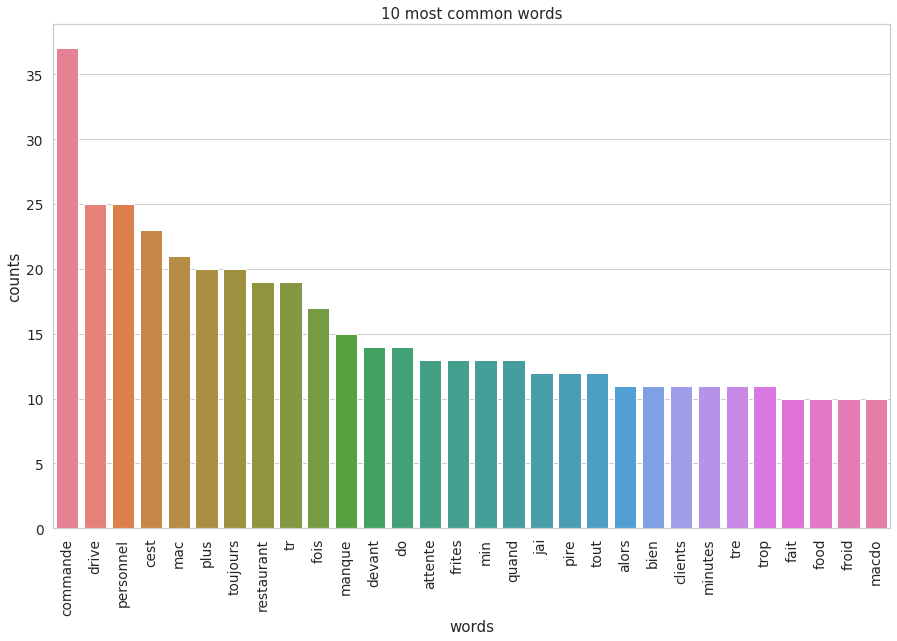

In [ ]:
#Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=['french'])
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['review_body'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)